In [1]:
import pandas as pd 
import matplotlib as plt 
import numpy as np
import scipy as sp

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk

In [4]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
df = pd.read_csv("restaurant.csv")

In [7]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [8]:
df["stars"].value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [9]:
df.shape

(10417, 10)

In [10]:
df["text"] = df["text"].str.lower()        # Everything in text column is lower now

In [11]:
df["text"] = df["text"].str.replace("[^\w\s]", "")     # remove punctuation marks

C:\Users\User\AppData\Local\Temp\ipykernel_21604\2446154677.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace("[^\w\s]", "")     # 2) noktalama işaretlerini kaldırdım


In [12]:
df["text"] = df["text"].str.replace("\d+", "")    # delete numbers

C:\Users\User\AppData\Local\Temp\ipykernel_21604\40905334.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace("\d+", "")    # 3) Rakamları kaldırdım


In [13]:
df["text"] = df["text"].str.replace("\r", "")      # no blank column

In [14]:
df["text"] = df["text"].str.replace("\n", "")       

In [15]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
from textblob import TextBlob

In [17]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment)

In [18]:
sentiment_series = df['polarity'].tolist()

In [19]:
df[["polarity","subjectivity"]] = pd.DataFrame(sentiment_series, index = df.index)

In [20]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,0.337330,0.586926
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,0.219409,0.537292
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,-0.134722,0.731944
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,-0.325000,0.400000
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,0.362500,0.725000
...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,0.543750,0.481250
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,0.210101,0.586869
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,0.480000,0.630000
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,0.185185,0.533333


In [21]:
df.loc[df["stars"]== 3, "sentiment"] = "neatural"
df.loc[df["stars"]< 3, "sentiment"] = "negative"
df.loc[df["stars"]> 3, "sentiment"] = "positive"

In [22]:
df.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity,sentiment
7880,2982305,8mPlu7WwQva4F-c-HQxxXQ,oPfdRksuiS2tnFEulQej3A,RESDUcs7fIiihp38-d6_6g,3,2,1,1,second time here and i think it is safe to say...,2016-10-23 02:14:55,0.310317,0.432540,neatural
9467,3133454,XLthi788FdiQ7MI6JmFzJg,7jvyOTyN1beM2r01L0GqHg,RESDUcs7fIiihp38-d6_6g,1,0,1,0,my experience actually happened around may ho...,2015-10-31 00:15:40,-0.100541,0.404004,negative
8676,3061119,5qWdXpIYWzUnVNMMNazqHw,HSRny3-rIp2_G048cqn7zA,RESDUcs7fIiihp38-d6_6g,5,0,0,0,this is my favorite place in las vegas you can...,2019-10-08 21:52:56,0.573333,0.930000,positive
7126,2919890,J_3SFlo8AyknQGaH2gwyYA,mXEVmWPpradY-R2BMoGAcQ,RESDUcs7fIiihp38-d6_6g,5,1,0,0,we sat for hours lunching and still felt we d...,2017-05-01 20:16:44,0.800000,0.750000,positive
4010,2672500,MBu3U7f3xRrptl1LJRxfIw,J4sLz_6hm5GpbKWreqZXEw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,we frequently travel to vegas from los angeles...,2018-02-28 21:41:16,0.114286,0.438095,positive
248,2387947,CKHsb_CSi2hMum685dwfdQ,H0YMJC37tK41ez5i4Zpl6g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the majority of the food was great seafood was...,2016-12-19 20:12:30,0.422727,0.784091,positive
10135,3195255,bz4OEpMmUsCVY9PdASMJqg,yGHP5LUQe73kOvYQZF6Dqg,RESDUcs7fIiihp38-d6_6g,5,10,7,6,foodie alert you must eat here before you die ...,2013-10-29 18:18:12,0.295000,0.755000,positive
2562,2562269,2f4hCVZHdjkhNmJP3c2qsw,ZRsn1mti9R1ol3vb7lHMaQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,early morning breakfast buffett excellent food...,2016-10-04 17:37:03,0.580000,0.610000,positive
9238,3113778,naMhqYNKb5dBIvH1_O_r9w,YYGP3k6P79JDdnPan9MzWw,RESDUcs7fIiihp38-d6_6g,4,0,0,0,now my favorite vegas buffet after some others...,2019-05-16 01:29:30,0.385000,0.806667,positive
631,2419817,_xAsj1-dl3MC5nGDP0-7gA,h6w1poSf18V_5VhOG79ROQ,RESDUcs7fIiihp38-d6_6g,2,0,0,0,most oc the food was tasted salty have varieti...,2016-08-14 04:32:08,-0.048593,0.421645,negative


In [23]:
!pip install langdetect   

In [24]:
from langdetect import detect

In [25]:
dfn = df[df["text"].apply(detect) == "en"]                # I take only English language comments to dfn 

In [26]:
dfn

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,0.337330,0.586926,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,0.219409,0.537292,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,-0.134722,0.731944,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,-0.325000,0.400000,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,0.362500,0.725000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,0.543750,0.481250,positive
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,0.210101,0.586869,positive
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,0.480000,0.630000,positive
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,0.185185,0.533333,positive


In [27]:
dfn = dfn.drop(7922)        # I delete manually english-chineese mixed comments. 
dfn = dfn.drop(6550)
dfn = dfn.drop(4631)
dfn = dfn.drop(10363)
dfn = dfn.drop(9323)

In [28]:
dfn.shape

(10369, 13)

In [29]:
from nltk.tokenize import word_tokenize

In [30]:
dfn['clean_text'] = dfn['text'].apply(lambda x: nltk.word_tokenize(x) ) 

In [31]:
dfn

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity,sentiment,clean_text
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,0.337330,0.586926,positive,"[after, getting, food, poisoning, at, the, pal..."
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,0.219409,0.537292,positive,"[a, feast, worthy, of, godsbaccarnal, buffet, ..."
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,-0.134722,0.731944,positive,"[the, crab, legs, are, better, than, the, ones..."
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,-0.325000,0.400000,negative,"[not, worth, it, too, salty, food, and, expens..."
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,0.362500,0.725000,positive,"[i, would, give, this, infinite, stars, if, i,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,0.543750,0.481250,positive,"[best, buffet, ever, irma, was, great, served,..."
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,0.210101,0.586869,positive,"[hollllllyyyy, moleyyyy, this, buffet, was, on..."
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,0.480000,0.630000,positive,"[the, selection, is, amazing, and, all, the, f..."
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,0.185185,0.533333,positive,"[one, of, the, best, buffets, ive, had, in, ve..."


In [32]:
from nltk.corpus import stopwords  
stopword = nltk.corpus.stopwords.words('english')

In [33]:
dfn['nonstop_text'] = dfn['clean_text'].apply(lambda x:[j for j  in x if j not in stopword])

In [34]:
dfn

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity,sentiment,clean_text,nonstop_text
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,0.337330,0.586926,positive,"[after, getting, food, poisoning, at, the, pal...","[getting, food, poisoning, palms, hotel, scare..."
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,0.219409,0.537292,positive,"[a, feast, worthy, of, godsbaccarnal, buffet, ...","[feast, worthy, godsbaccarnal, buffet, caesar,..."
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,-0.134722,0.731944,positive,"[the, crab, legs, are, better, than, the, ones...","[crab, legs, better, ones, wicked, spoon, huge..."
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,-0.325000,0.400000,negative,"[not, worth, it, too, salty, food, and, expens...","[worth, salty, food, expensive, furst, kast, v..."
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,0.362500,0.725000,positive,"[i, would, give, this, infinite, stars, if, i,...","[would, give, infinite, stars, could, family, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,0.543750,0.481250,positive,"[best, buffet, ever, irma, was, great, served,...","[best, buffet, ever, irma, great, served, us, ..."
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,0.210101,0.586869,positive,"[hollllllyyyy, moleyyyy, this, buffet, was, on...","[hollllllyyyy, moleyyyy, buffet, one, books, i..."
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,0.480000,0.630000,positive,"[the, selection, is, amazing, and, all, the, f...","[selection, amazing, food, excellently, prepar..."
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,0.185185,0.533333,positive,"[one, of, the, best, buffets, ive, had, in, ve...","[one, best, buffets, ive, vegas, visit, unfort..."


In [35]:
from nltk.stem import LancasterStemmer
stemmer_output = nltk.PorterStemmer()

In [36]:
# dfn['stemmed_text'] = dfn['nonstop_text'].apply(lambda x:[stemmer_output.stem(j) for j in x])   

In [37]:
dfn

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity,sentiment,clean_text,nonstop_text
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,0.337330,0.586926,positive,"[after, getting, food, poisoning, at, the, pal...","[getting, food, poisoning, palms, hotel, scare..."
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,0.219409,0.537292,positive,"[a, feast, worthy, of, godsbaccarnal, buffet, ...","[feast, worthy, godsbaccarnal, buffet, caesar,..."
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,-0.134722,0.731944,positive,"[the, crab, legs, are, better, than, the, ones...","[crab, legs, better, ones, wicked, spoon, huge..."
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,-0.325000,0.400000,negative,"[not, worth, it, too, salty, food, and, expens...","[worth, salty, food, expensive, furst, kast, v..."
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,0.362500,0.725000,positive,"[i, would, give, this, infinite, stars, if, i,...","[would, give, infinite, stars, could, family, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,0.543750,0.481250,positive,"[best, buffet, ever, irma, was, great, served,...","[best, buffet, ever, irma, great, served, us, ..."
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,0.210101,0.586869,positive,"[hollllllyyyy, moleyyyy, this, buffet, was, on...","[hollllllyyyy, moleyyyy, buffet, one, books, i..."
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,0.480000,0.630000,positive,"[the, selection, is, amazing, and, all, the, f...","[selection, amazing, food, excellently, prepar..."
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,0.185185,0.533333,positive,"[one, of, the, best, buffets, ive, had, in, ve...","[one, best, buffets, ive, vegas, visit, unfort..."


In [38]:
dfn['cleaned_text'] = dfn['nonstop_text'].apply(lambda x: ' '.join(x) )

In [39]:
dfn

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity,sentiment,clean_text,nonstop_text,cleaned_text
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,0.337330,0.586926,positive,"[after, getting, food, poisoning, at, the, pal...","[getting, food, poisoning, palms, hotel, scare...",getting food poisoning palms hotel scared eat ...
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,0.219409,0.537292,positive,"[a, feast, worthy, of, godsbaccarnal, buffet, ...","[feast, worthy, godsbaccarnal, buffet, caesar,...",feast worthy godsbaccarnal buffet caesar palac...
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,-0.134722,0.731944,positive,"[the, crab, legs, are, better, than, the, ones...","[crab, legs, better, ones, wicked, spoon, huge...",crab legs better ones wicked spoon huge prawns...
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,-0.325000,0.400000,negative,"[not, worth, it, too, salty, food, and, expens...","[worth, salty, food, expensive, furst, kast, v...",worth salty food expensive furst kast visit bu...
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,0.362500,0.725000,positive,"[i, would, give, this, infinite, stars, if, i,...","[would, give, infinite, stars, could, family, ...",would give infinite stars could family diamond...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,0.543750,0.481250,positive,"[best, buffet, ever, irma, was, great, served,...","[best, buffet, ever, irma, great, served, us, ...",best buffet ever irma great served us better p...
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,0.210101,0.586869,positive,"[hollllllyyyy, moleyyyy, this, buffet, was, on...","[hollllllyyyy, moleyyyy, buffet, one, books, i...",hollllllyyyy moleyyyy buffet one books iv neve...
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,0.480000,0.630000,positive,"[the, selection, is, amazing, and, all, the, f...","[selection, amazing, food, excellently, prepar...",selection amazing food excellently prepared es...
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,0.185185,0.533333,positive,"[one, of, the, best, buffets, ive, had, in, ve...","[one, best, buffets, ive, vegas, visit, unfort...",one best buffets ive vegas visit unfortunately...


In [40]:
import seaborn as sns 

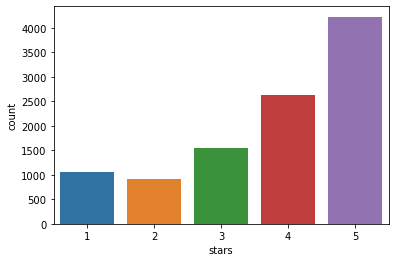

In [41]:
sns.countplot(x = dfn["stars"]);

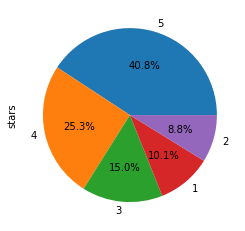

In [42]:
df["stars"].value_counts().plot.pie(autopct = "%1.1f%%");

In [43]:
buffet = dfn[(dfn.stars == 1)|(dfn.stars == 5 )]    # When I take only 1 and 5 stars, I get more accurate result.

In [44]:
#buffet = dfn[(dfn.stars == 1)|(dfn.stars == 2)|(dfn.stars == 4)|(dfn.stars == 5 )]   # 1-2 negative, 4-5 positive 

In [45]:
buffet.reset_index(drop = True, inplace = True)            # Rank index from 0 to 1

In [46]:
buffet

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity,sentiment,clean_text,nonstop_text,cleaned_text
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,0.337330,0.586926,positive,"[after, getting, food, poisoning, at, the, pal...","[getting, food, poisoning, palms, hotel, scare...",getting food poisoning palms hotel scared eat ...
1,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,-0.325000,0.400000,negative,"[not, worth, it, too, salty, food, and, expens...","[worth, salty, food, expensive, furst, kast, v...",worth salty food expensive furst kast visit bu...
2,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,0.362500,0.725000,positive,"[i, would, give, this, infinite, stars, if, i,...","[would, give, infinite, stars, could, family, ...",would give infinite stars could family diamond...
3,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34,0.187500,0.335145,positive,"[really, enjoyed, everything, they, had, to, o...","[really, enjoyed, everything, offer, good, ide...",really enjoyed everything offer good idea star...
4,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19,0.225000,0.441667,positive,"[lots, of, choices, good, service, line, wasnt...","[lots, choices, good, service, line, wasnt, lo...",lots choices good service line wasnt long expe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,3219831,--Rcc25wmvC2YikMKO1duQ,EKLCM0XAOTq14wNnuMAGWA,RESDUcs7fIiihp38-d6_6g,5,1,0,0,we went to bacchanal on easter sunday as it wa...,2019-04-28 18:59:53,0.505000,0.655000,positive,"[we, went, to, bacchanal, on, easter, sunday, ...","[went, bacchanal, easter, sunday, brothers, bi...",went bacchanal easter sunday brothers birthday...
5272,3219849,LbMPx0u9mAcaVDOYiiArsQ,0wNZkuUFDnMA_8YP_PE3Zw,RESDUcs7fIiihp38-d6_6g,1,0,0,0,came him from la thanksgiving week we decided ...,2019-12-05 18:01:49,-0.189815,0.613889,negative,"[came, him, from, la, thanksgiving, week, we, ...","[came, la, thanksgiving, week, decided, eat, w...",came la thanksgiving week decided eat waiting ...
5273,3219894,ErLDRaBYPyt8x6DkJuY9TA,YhLSS4TmTFuQOrN4RAUlBw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,every time we visit las vegas we go to this bu...,2019-12-05 21:34:56,1.000000,0.300000,positive,"[every, time, we, visit, las, vegas, we, go, t...","[every, time, visit, las, vegas, go, buffet, b...",every time visit las vegas go buffet buffet bi...
5274,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,0.543750,0.481250,positive,"[best, buffet, ever, irma, was, great, served,...","[best, buffet, ever, irma, great, served, us, ...",best buffet ever irma great served us better p...


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [48]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [49]:
x = buffet["cleaned_text"]
y = buffet["stars"]

In [50]:
x

0       getting food poisoning palms hotel scared eat ...
1       worth salty food expensive furst kast visit bu...
2       would give infinite stars could family diamond...
3       really enjoyed everything offer good idea star...
4       lots choices good service line wasnt long expe...
                              ...                        
5271    went bacchanal easter sunday brothers birthday...
5272    came la thanksgiving week decided eat waiting ...
5273    every time visit las vegas go buffet buffet bi...
5274    best buffet ever irma great served us better p...
5275    selection amazing food excellently prepared es...
Name: cleaned_text, Length: 5276, dtype: object

In [51]:
vect = CountVectorizer(ngram_range =(1,3))          

In [52]:
x = vect.fit_transform(x)                    # (Sparse Matrix) Turn X to Vector

In [53]:
x.shape

(5276, 489321)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20, random_state = 42)

In [55]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()

In [56]:
l.fit(x_train,y_train)

LogisticRegression()

In [57]:
tahmin = l.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(tahmin, y_test)

0.9535984848484849

In [60]:
confusion_matrix(tahmin, y_test)

array([[157,  10],
       [ 39, 850]], dtype=int64)

In [61]:
print(classification_report(tahmin,y_test))

              precision    recall  f1-score   support

           1       0.80      0.94      0.87       167
           5       0.99      0.96      0.97       889

    accuracy                           0.95      1056
   macro avg       0.89      0.95      0.92      1056
weighted avg       0.96      0.95      0.96      1056



In [62]:
from sklearn.neighbors import KNeighborsClassifier           # neighbors method
k =  KNeighborsClassifier()

In [63]:
k.fit(x_train, y_train)

KNeighborsClassifier()

In [64]:
tahmin2 = k.predict(x_test)

In [65]:
accuracy_score(tahmin2, y_test)

0.8172348484848485

In [66]:
confusion_matrix(tahmin2, y_test)

array([[  5,   2],
       [191, 858]], dtype=int64)

In [67]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()

In [68]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
tahmin3 = d.predict(x_test)

In [70]:
accuracy_score(tahmin3, y_test)

0.865530303030303

In [71]:
confusion_matrix(tahmin3, y_test)

array([[126,  72],
       [ 70, 788]], dtype=int64)

In [72]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()

In [73]:
tahmin4 = r.fit(x_train,y_train).predict(x_test)

In [74]:
accuracy_score(tahmin4,y_test)

0.8522727272727273

In [75]:
confusion_matrix(tahmin4, y_test)

array([[ 40,   0],
       [156, 860]], dtype=int64)

<AxesSubplot:>

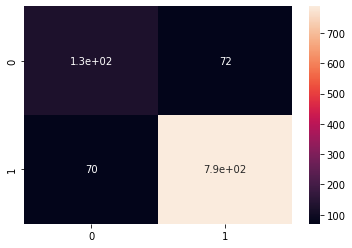

In [76]:
sns.heatmap(confusion_matrix(tahmin3,y_test), annot = True)

In [77]:
from sklearn.ensemble import AdaBoostClassifier 
a = AdaBoostClassifier()

In [78]:
tahmin5 = a.fit(x_train,y_train).predict(x_test)

In [79]:
accuracy_score(tahmin5,y_test)

0.9308712121212122

In [80]:
confusion_matrix(tahmin5, y_test)

array([[137,  14],
       [ 59, 846]], dtype=int64)

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gr = GradientBoostingClassifier()

In [82]:
tahmin6 = gr.fit(x_train,y_train).predict(x_test)

In [83]:
accuracy_score(tahmin6,y_test)

0.9242424242424242

In [84]:
confusion_matrix(tahmin6, y_test)

array([[122,   6],
       [ 74, 854]], dtype=int64)

In [85]:
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB()

In [86]:
tahmin7 = m.fit(x_train,y_train).predict(x_test)

In [87]:
accuracy_score(tahmin7, y_test)

0.9564393939393939

In [88]:
confusion_matrix(tahmin7, y_test)

array([[167,  17],
       [ 29, 843]], dtype=int64)

In [89]:
from sklearn.naive_bayes import BernoulliNB
b = BernoulliNB()

In [90]:
tahmin8 = b.fit(x_train,y_train).predict(x_test)

In [91]:
accuracy_score(tahmin8,y_test)

0.8106060606060606

In [92]:
confusion_matrix(tahmin8, y_test)

array([[ 20,  24],
       [176, 836]], dtype=int64)

In [93]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [94]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS

In [95]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white",
                  mask = mask,
                  width = 2500,
                  height = 1800, 
                  max_words = 500,
                  stopwords = stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    path = "wc.png"
    display(Image.open(path))

In [96]:
text1 = dfn[dfn["stars"] == 1]

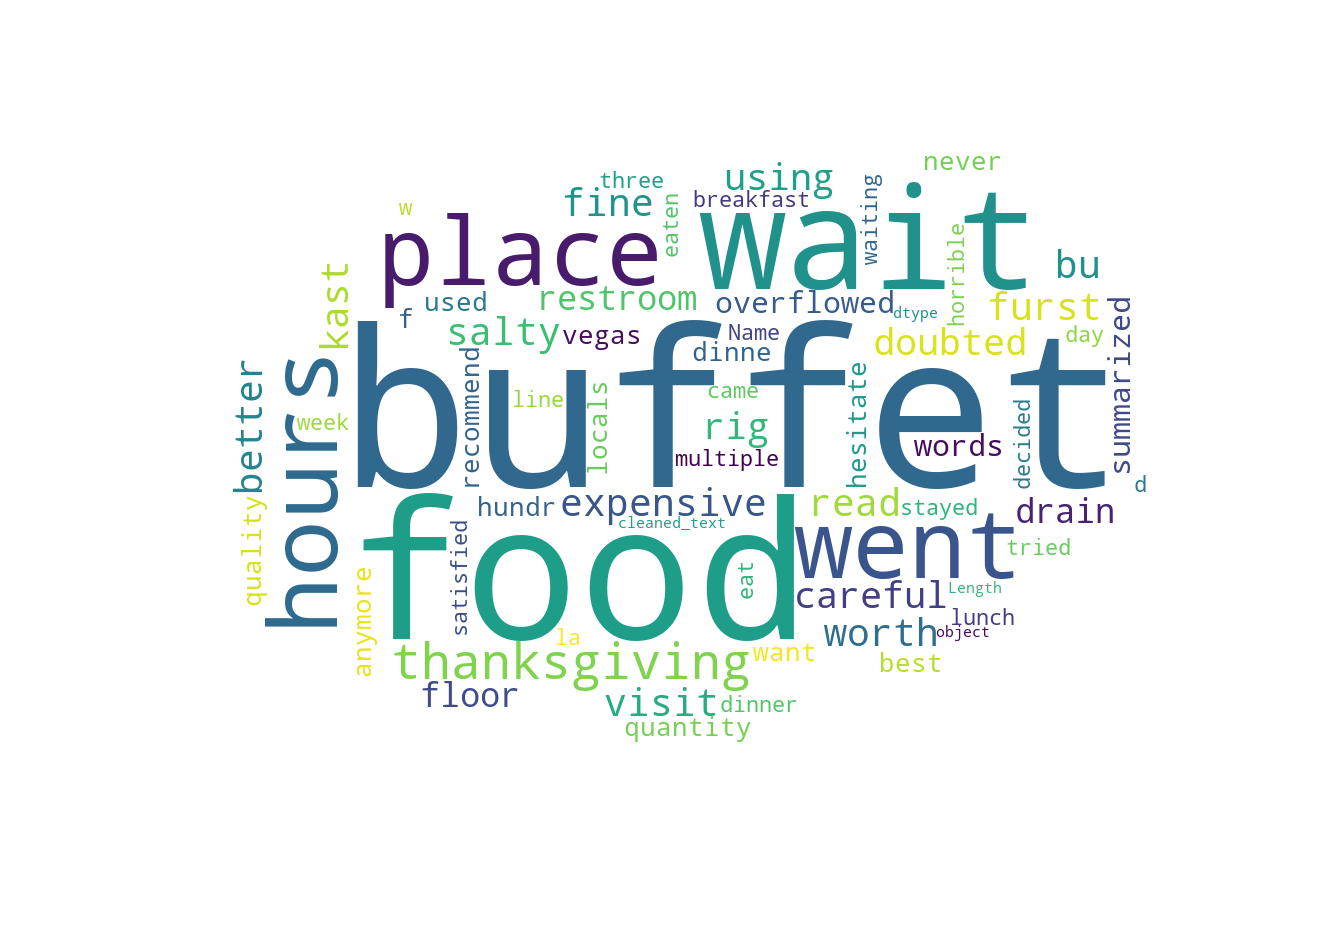

In [104]:
create_wordcloud(text1.cleaned_text)

In [98]:
text2 = dfn[dfn["stars"] == 5] 

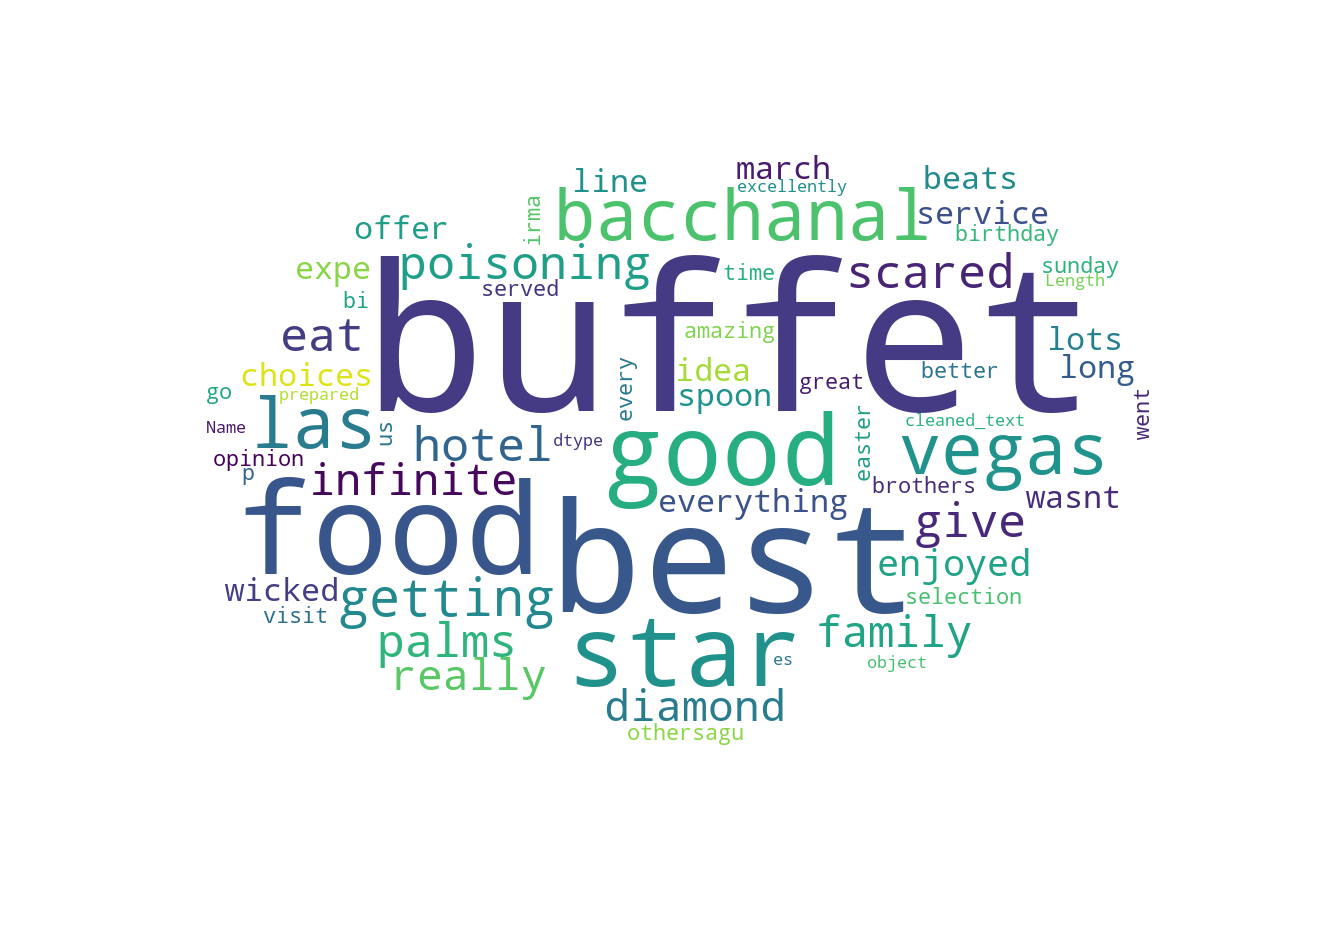

In [105]:
create_wordcloud(text2.cleaned_text)

In [100]:
text3 = dfn[dfn["sentiment"] == "positive"] 

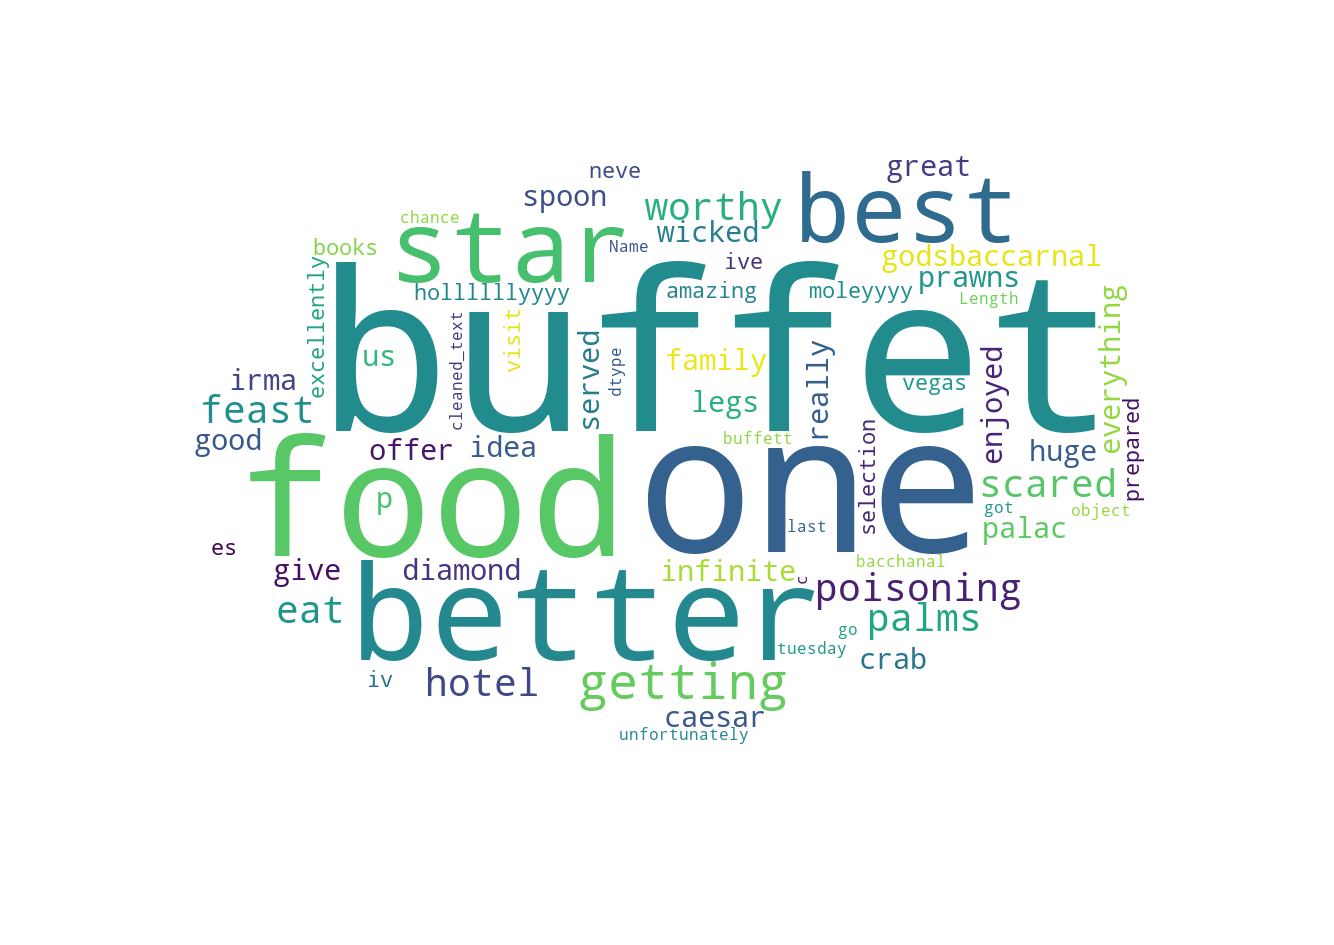

In [106]:
create_wordcloud(text3.cleaned_text)

In [102]:
text4 = dfn[dfn["sentiment"] == "negative"] 

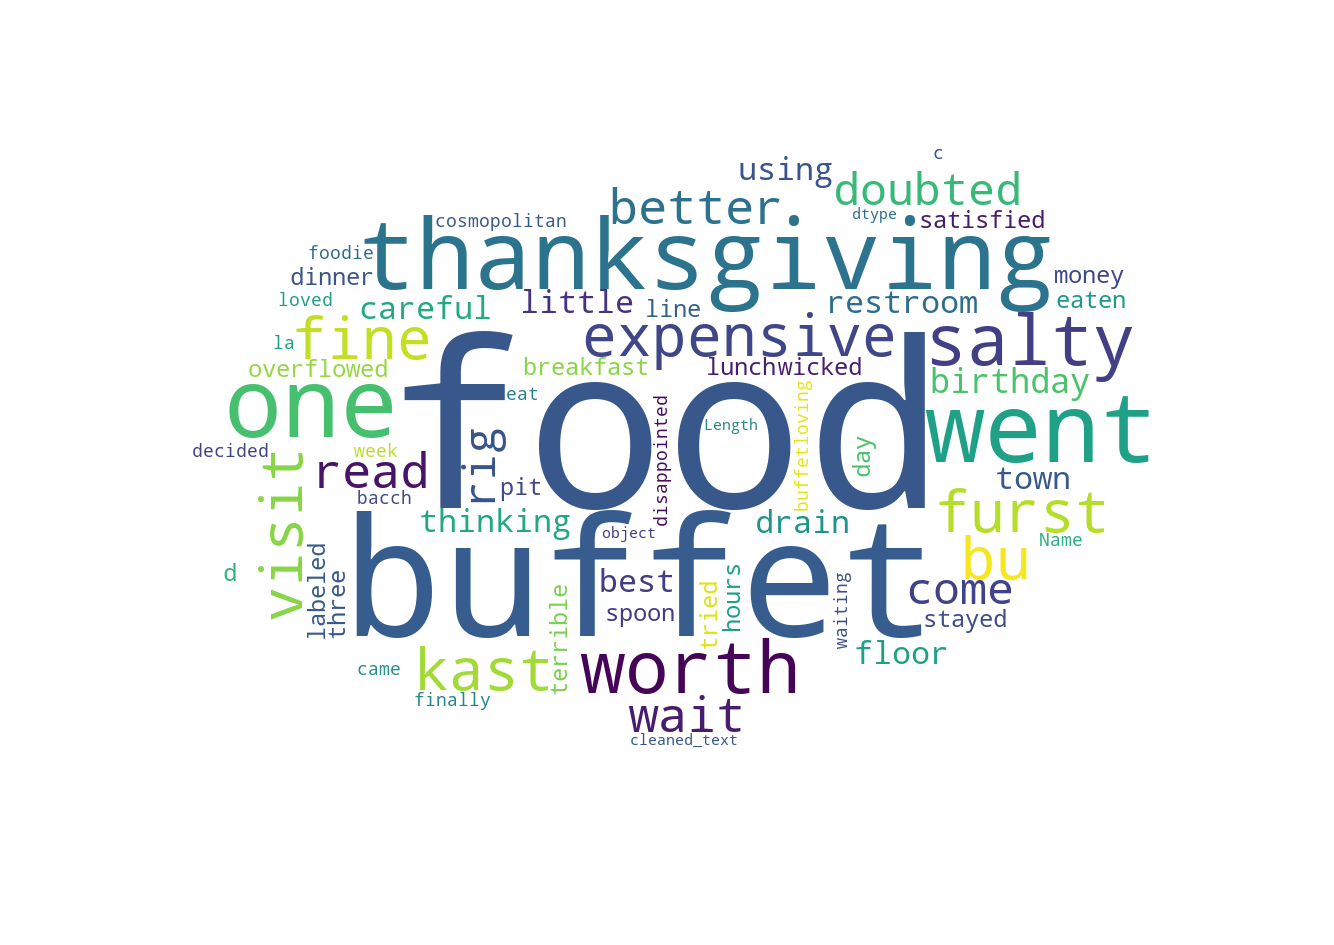

In [107]:
create_wordcloud(text4.cleaned_text)